In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
def line(x, a, b, s):
    """
    :param x: vector of x values, np.arange(-10, 10, 0.1)
    :param a: a parameter of the line
    :param b: b parameter of the line
    :param s: sigma parameret of the noise (with normal distribution)
    """
    y = a*x + b
    y += s * np.random.randn(len(y))
    
    return y

In [72]:
a=-12.
b=-2.
s=5.

XYp={'x':np.array(np.arange(1,25,2.3)),'y':np.array([])}
XYp['y'] = line(XYp['x'], a, b, s)
for i in range(len(XYp['y'])):
    print('point ',i,'[X=',XYp['x'][i],',Y=',XYp['y'][i],']')
n = len(XYp['x'])

point  0 [X= 1.0 ,Y= -10.273349413358858 ]
point  1 [X= 3.3 ,Y= -47.346150378783584 ]
point  2 [X= 5.6 ,Y= -65.33632509252726 ]
point  3 [X= 7.8999999999999995 ,Y= -101.69171748140722 ]
point  4 [X= 10.2 ,Y= -125.20864078251525 ]
point  5 [X= 12.5 ,Y= -144.6481595541998 ]
point  6 [X= 14.799999999999999 ,Y= -184.4920132441338 ]
point  7 [X= 17.099999999999998 ,Y= -191.36501986874086 ]
point  8 [X= 19.4 ,Y= -232.1879446465846 ]
point  9 [X= 21.7 ,Y= -264.8602872012924 ]
point  10 [X= 24.0 ,Y= -292.9704702776055 ]


In [73]:
sumX = sum(XYp['x'])
sumY = sum(XYp['y'])
sumXY = 0.
sumXqrt = 0.
sum_Xqrt_Y = 0.
sumXqrt3 = 0.
sumXqrt4 = 0.

In [74]:
for i in range(len(XYp['y'])):
    sumXY += XYp['x'][i]*XYp['y'][i]
    sumXqrt += XYp['x'][i]**2

In [75]:
a = (n*sumXY - sumX*sumY)/(n*sumXqrt - sumX**2)
b = (sumY - a*sumX)/n
XYl1 = {'x':[min(XYp['x'])-3,max(XYp['x'])+3]}
XYl1['y'] = [a*i+b for i in XYl1['x']]
XYl2 = {'x':XYp['x'].copy()}
XYl2['y'] = [(((i+1)**(1./3))+1) for i in XYl2['x']]

In [76]:
print('a = ',a,'\tb = ',b)
print('Xpoint = ',XYp['x'],'\nYpoint = ',XYp['y'])
print('\nXline 1 = ',XYl1['x'],'\nYline 1 = ',XYl1['y'])
print('\nXline 2 = ',XYl2['x'],'\nYline 2 = ',XYl2['y'])

a =  -11.94753750003845 	b =  -1.5994246987147562
Xpoint =  [ 1.   3.3  5.6  7.9 10.2 12.5 14.8 17.1 19.4 21.7 24. ] 
Ypoint =  [ -10.27334941  -47.34615038  -65.33632509 -101.69171748 -125.20864078
 -144.64815955 -184.49201324 -191.36501987 -232.18794465 -264.8602872
 -292.97047028]

Xline 1 =  [-2.0, 27.0] 
Yline 1 =  [22.295650301362144, -324.1829371997529]

Xline 2 =  [ 1.   3.3  5.6  7.9 10.2 12.5 14.8 17.1 19.4 21.7 24. ] 
Yline 2 =  [2.2599210498948734, 2.626133331679169, 2.8757774553669035, 3.0723510980592605, 3.2373778841627936, 3.381101577952299, 3.5092987040930996, 3.625585659196379, 3.7323944160944684, 3.8314481885281864, 3.924017738212866]


Text(25.45, 3.924017738212866, 'line 2')

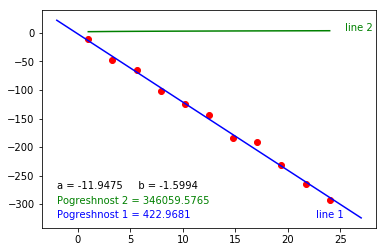

In [77]:
plt.plot(XYp['x'],XYp['y'],'ro')
plt.plot(XYl1['x'],XYl1['y'],color='blue')
plt.plot(XYl2['x'],XYl2['y'],color='Green')

otkl1 = 0.
for i in range(n):
    otkl1 += ((XYp['y'][i]-((a*XYp['x'][i])+b))**2)
    
otkl2 = 0.    
for i in range(n):
    otkl2 += ((XYp['y'][i]-((XYp['x'][i]+1)**(1./3)+1))**2)
    
plt.text(XYl1['x'][0],XYl1['y'][1],'Pogreshnost 1 = '+str(round(otkl1,4)),color='blue')
plt.text(XYl1['x'][0],(XYl1['y'][1]-(XYl1['y'][1]-XYl1['y'][0])*0.07),'Pogreshnost 2 = '+str(round(otkl2,4)),color='Green')
plt.text(XYl1['x'][0],(XYl1['y'][1]-(XYl1['y'][1]-XYl1['y'][0])*0.15),'a = '+str(round(a,4))+'     b = '+str(round(b,4)),color='black')
plt.text((XYl1['x'][1]-(XYl1['x'][1]-XYl1['x'][0])*0.15),XYl1['y'][1],'line 1',color='blue')
plt.text((XYl2['x'][-1]+(XYl1['x'][1]-XYl1['x'][0])*0.05),XYl2['y'][-1],'line 2',color='Green')